# Question :

Implement Logistic Regression with Mini-Batch Gradient Descent using Tensorflow. 
Train it and evaluate it on the Moons dataset. 
Try adding all the bells and whistles :
<li>Define the graph within a Logistic Regression function that can be re-used easily</li>
<li>Save Checkpoints using a Saver at regular intervals during training and save the final model at the end of the training</li>
<li>Restore the last CheckPoint upon statup if training was interrupted</li>
<li>Define the graph using nice scopes so the graph looks good in TensorBoard</li>
<li>Add summaries to vizualize the learning curve in TensorBoard</li>
<li>Try Tweeking some Hyperparameters such as the Learning Rate or the mini-batch size and look at the shape of the learning curve</li>

# Code

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Inputs

As input, moons data with 1000 points, a noise of 0.05 and a fixed random state to have a repetable model

In [2]:
size = 1000
X_moons, y_moons = make_moons(size, noise=0.05, random_state=42)

In [3]:
print(X_moons.shape) # position X Y
print(y_moons.shape) # class of the element
print(X_moons)

(1000, 2)
(1000,)
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ..., 
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


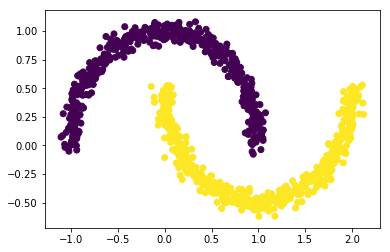

In [4]:
X = X_moons[:,0]
Y = X_moons[:,1]
plt.scatter(X, Y, c=y_moons)
plt.show()

Now let's split the model with a train dataset and test dataset

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_moons, y_moons, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


In [6]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [7]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
print(X_train)

[[ 1.          1.97745005  0.23407969]
 [ 1.         -0.82837958  0.6150167 ]
 [ 1.          0.9213927   0.02887937]
 ..., 
 [ 1.         -1.05066845  0.11417568]
 [ 1.          0.71871673  0.67756058]
 [ 1.          2.00751033  0.33536132]]


As we goona use the sigmoid function as activation function, we need to have centered datas so we can use StandardScaler from sklearn

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

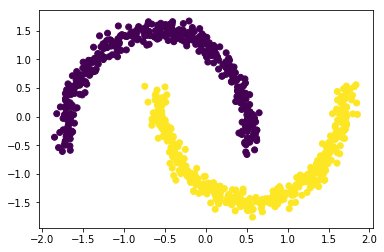

In [9]:
X = X_train[:,1]
Y = X_train[:,2]
plt.scatter(X, Y, c=Y_train)
plt.show()

In [10]:
n, m =  X_train.shape
print(n, m)

800 3


Let's now create the tensorflow graph

In [11]:
# all placeholder
X_ph = tf.placeholder(tf.float32, shape=(None, m), name="X")
Y_ph = tf.placeholder(tf.float32, shape=(None, 1), name="Y")
theta = tf.Variable(tf.random_uniform([m, 1], -1, 1), name="theta")

In [12]:
# estimated output
y_est = tf.matmul(X_ph, theta , name="estimation")

In [13]:
# probabily of being from class 1
proba = tf.sigmoid(y_est)

In [14]:
# estimation of the error to improve the model
loss = tf.losses.log_loss(Y_ph, proba)

In [15]:
# Using GDO to train the theta of the model
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [16]:
def random_batch(X_train, y_train, batch_size):
    """ this create a batch of X and Y of size "batch_size" """
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

def reset_graph(seed=42):
    """Simple function to clear tf"""
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [17]:
sess = tf.InteractiveSession()

Now the session is active, we can train the model. For this we gonna run 1000 batches of 50 elements. Between every batches, the model will optimise the theta to reduce the loss.
We can print every 100 batches the current loss of our model calculated on test set (as we evaluate it)

In [18]:
init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(n / batch_size))

sess.run(init)

for epoch in range(n_epochs):
    for batch_index in range(n_batches):
        X_batch, y_batch = random_batch(X_train, Y_train, batch_size)
        sess.run(training_op, feed_dict={X_ph: X_batch, Y_ph: y_batch})
    loss_val = loss.eval({X_ph: X_test, Y_ph: Y_test})
    if epoch % 100 == 0:
        print("Epoch:", epoch, "\tLoss:", loss_val)
        print(theta.eval())

#y_proba_val = proba.eval(feed_dict={X_ph: X_test, Y_ph: Y_test})

Epoch: 0 	Loss: 0.815463
[[-0.01650691]
 [ 0.73594826]
 [ 0.67310578]]
Epoch: 100 	Loss: 0.280933
[[-0.01650691]
 [ 1.09969807]
 [-1.64036369]]
Epoch: 200 	Loss: 0.256228
[[-0.01650691]
 [ 1.03695285]
 [-2.22513342]]
Epoch: 300 	Loss: 0.249584
[[-0.01650691]
 [ 1.00200284]
 [-2.53203249]]
Epoch: 400 	Loss: 0.247275
[[-0.01650691]
 [ 0.98922116]
 [-2.70608902]]
Epoch: 500 	Loss: 0.246114
[[-0.01650691]
 [ 1.00189924]
 [-2.82165289]]
Epoch: 600 	Loss: 0.245681
[[-0.01650691]
 [ 0.98601645]
 [-2.89799762]]
Epoch: 700 	Loss: 0.24526
[[-0.01650691]
 [ 1.00083637]
 [-2.95854378]]
Epoch: 800 	Loss: 0.24506
[[-0.01650691]
 [ 1.00663245]
 [-2.99705672]]
Epoch: 900 	Loss: 0.24499
[[-0.01650691]
 [ 1.0024749 ]
 [-3.02484393]]


We can try to plot probability on 1 direction by fixing either the X or Y and moving to the other direction. Unfortunately, the model is linear so only the result is not really interesting

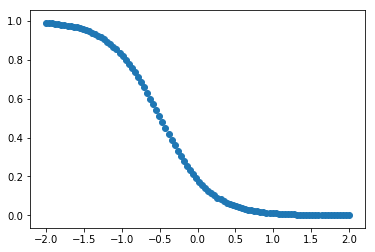

In [19]:
bias = np.zeros(100)
X1 = np.linspace(-2, 2, 100)
Y1 = -1.5*np.ones(100)
X_eval = np.c_[bias, Y1, X1]
y_proba_val = proba.eval(feed_dict={X_ph: X_eval})
plt.scatter(X1, y_proba_val)
plt.show()

We can also check which points are wrong evalutated compare to real value. Those are shown with "x" instead of "o"

In [20]:
y_proba_val = proba.eval(feed_dict={X_ph: X_test})
y_proba_bool = (y_proba_val >= 0.5)
#print(np.c_[Y_test, y_proba_bool])

In [21]:
X = X_test[:,1]
Y = X_test[:,2]
comparator = (y_proba_bool == Y_test)
m = {True : "o", False : "x"}
comparator = np.vectorize(m.get)(comparator)
n = {0 : "red", 1 : "blue"}
colors = np.vectorize(n.get)(Y_test)

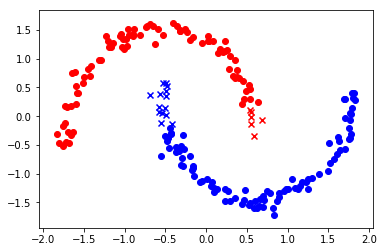

In [22]:
for x, y, c, m in zip(X, Y, colors, comparator):
    #print(x, y, c[0], f[0])
    plt.scatter(x, y, c=c[0], marker = m[0])    
plt.show()

We can see the the middle of the model is wrong only as we try to pass a ligne an minimizes incorrect points.

# Improvements

We can imagine that a polynome of higher dimensions (for ex 3) can clearly fit better the data. Let's try it and saving training informations

In [23]:
sess.close()
reset_graph()

Creation of the Model in a reusable function

In [24]:
def log_reg_model(X, y, init_model= None, seed = 42, LR = 0.01):  
    n_instance, n_feature = X.shape
    with tf.name_scope("Model"):
        if init_model is None:
            random_init = tf.random_uniform([n_feature, 1], -1, 1, seed=seed)
            print(random_init)
        theta = tf.Variable(random_init, name="theta")

        y_est = tf.matmul(X_ph, theta , name="estimation")
        y_proba = tf.sigmoid(y_est)
        
    with tf.name_scope("Training"):
        proba = tf.sigmoid(y_est)
        loss = tf.losses.log_loss(Y_ph, proba)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=LR)
        training_op = optimizer.minimize(loss)
        loss_summary = tf.summary.scalar('log_loss', loss)
        
    with tf.name_scope("init"):
        init = tf.global_variables_initializer()
        
    with tf.name_scope("save"):
        saver = tf.train.Saver()
        
    return y_proba, loss, training_op, loss_summary, init, saver

Preparation of datas for a polynomial regression of dimensions 3. For this we can use the function "PolynomialFeatures" from sklearn

In [25]:
size = 1000
X_moons, y_moons = make_moons(size, noise=0.05, random_state=42)
print(X_moons[:10])
poly = PolynomialFeatures(3)
X = poly.fit_transform(X_moons)
print(X[:10])
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, Y_train, Y_test = train_test_split(X, y_moons, test_size=0.2)

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

n_instance, n_feature = X.shape

X_ph = tf.placeholder(tf.float32, shape=(None, n_feature), name="X")
Y_ph = tf.placeholder(tf.float32, shape=(None, 1), name="Y")

[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 [ 0.37736316 -0.39703717]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 0.68246733  0.80712069]]
[[  1.00000000e+00  -2.13712418e-02   4.06186076e-01   4.56729975e-04
   -8.68070083e-03   1.64987128e-01  -9.76088671e-06   1.85517356e-04
   -3.52597981e-03   6.70154743e-02]
 [  1.00000000e+00   9.76700451e-01  -4.58323065e-01   9.53943771e-01
   -4.47644344e-01   2.10060032e-01   9.31717312e-01  -4.37214433e-01
    2.05165728e-01  -9.62753576e-02]
 [  1.00000000e+00   9.04058818e-01  -3.76519518e-01   8.17322347e-01
   -3.40395791e-01   1.41766948e-01   7.38907475e-01  -3.07737816e-01
    1.28165659e-01  -5.33780229e-02]
 [  1.00000000e+00   3.77363156e-01  -3.97037167e-01   1.42402951e-01
   -1.49827199e-01   1.57638512e-01   5.37376272e-02  -5.65392645e-02
    5.94869665e-02  -6.25883484e-02]
 [  1.00000000e+00  -

In [26]:
y_proba, loss, training_op, loss_summary, init, saver = log_reg_model(X_train, Y_train)

Tensor("Model/random_uniform:0", shape=(10, 1), dtype=float32)


We can now train the model

In [27]:
sess = tf.InteractiveSession()

In [28]:
file_writer = tf.summary.FileWriter("/logreg/" + datetime.datetime.utcnow().strftime("%Y%m%d%H%M%S"), tf.get_default_graph())

n_epochs =3000
batch_size = 50
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

if os.path.isfile(checkpoint_epoch_path):
    # if the checkpoint file exists, restore the model and load the epoch number
    with open(checkpoint_epoch_path, "rb") as f:
        start_epoch = int(f.read())
    print("Training was interrupted. Continuing at epoch", start_epoch)
    saver.restore(sess, checkpoint_path)
else:
    start_epoch = 0
    sess.run(init)

for epoch in range(n_epochs):
    for batch_index in range(n_batches):
        X_batch, y_batch = random_batch(X_train, Y_train, batch_size)
        sess.run(training_op, feed_dict={X_ph: X_batch, Y_ph: y_batch})
    loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X_ph: X_test, Y_ph: Y_test})
    file_writer.add_summary(summary_str, epoch)
    if epoch % 500 == 0:
        print("Epoch:", epoch, "\tLoss:", loss_val)    
        saver.save(sess, checkpoint_path)
        with open(checkpoint_epoch_path, "wb") as f:
            f.write(b"%d" % (epoch + 1))
                
saver.save(sess, final_model_path)
y_proba_val = y_proba.eval(feed_dict={X_ph: X_test, Y_ph: Y_test})
os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.867755
Epoch: 500 	Loss: 0.162372
Epoch: 1000 	Loss: 0.122215
Epoch: 1500 	Loss: 0.0968575
Epoch: 2000 	Loss: 0.0795513
Epoch: 2500 	Loss: 0.0672926


In [29]:
sess.close()

As we did on the previous model, we can plot the errorsand we can see that the model fit clearly more the model

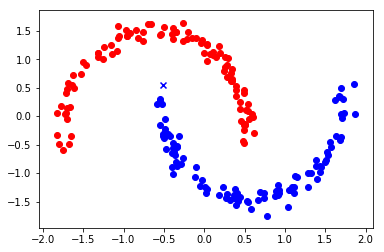

In [30]:
y_proba_bool = (y_proba_val >= 0.5)

X = X_test[:,1]
Y = X_test[:,2]
comparator = (y_proba_bool == Y_test)
m = {True : "o", False : "x"}
comparator = np.vectorize(m.get)(comparator)
n = {0 : "red", 1 : "blue"}
colors = np.vectorize(n.get)(Y_test)

for x, y, c, m in zip(X, Y, colors, comparator):
    plt.scatter(x, y, c=c[0], marker = m[0])    
plt.show()

We can also check the Confusion Matrix from sklearn which shows:

\begin{vmatrix}
\ TrueNegative & FalsePositive \\
\ FalseNegative &  TruePositive \\
\end{vmatrix}


In [31]:
print(confusion_matrix(Y_test, y_proba_bool))

[[100   0]
 [  1  99]]


We have only 1 False Negative which is pretty good. Of course if we increase noise, this will increase as it will be more difficult to fit.